## Start by importing our usual things:

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# to use interactivity
import ipywidgets

In [5]:
buildings = pd.read_csv('building_inventory.csv')

<Axes: xlabel='Square Footage', ylabel='Year Acquired'>

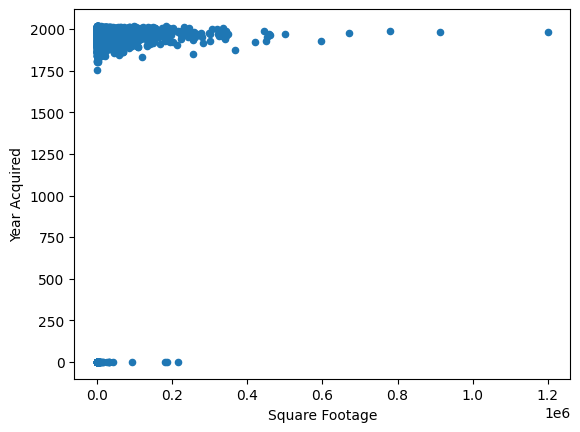

In [6]:
buildings.plot(x='Square Footage', y='Year Acquired', kind='scatter')
# I see some weird things here -- namily zero year and zero sq footage

In [7]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


In [8]:
buildings = pd.read_csv('building_inventory.csv', 
                       na_values={'Square Footage':0, 
                                 'Year Acquired': 0,
                                 'Year Constructed': 0,
                                 'Floors': 0})

<Axes: xlabel='Year Acquired', ylabel='Square Footage'>

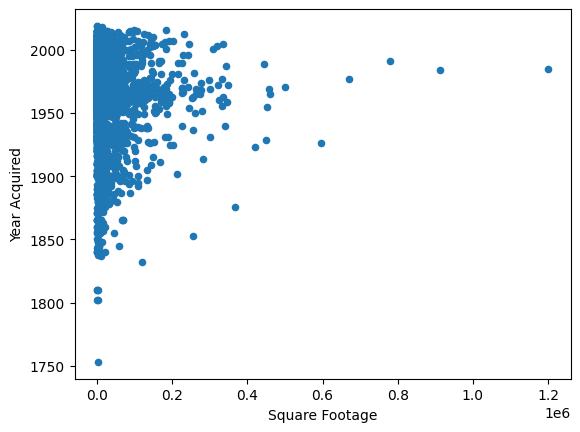

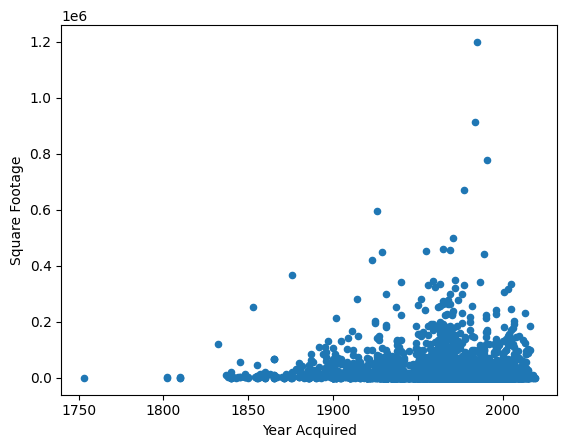

In [9]:
buildings.plot(x='Square Footage', y='Year Acquired', kind='scatter')
buildings.plot(y='Square Footage', x='Year Acquired', kind='scatter')

Last time we used some pandas functions to make a new dataframe:

In [10]:
stats = buildings.groupby('Year Acquired')['Square Footage'].describe()

In [11]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [12]:
def make_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(1,1,figsize=(4,2))
        ax.plot(stats["max"], marker='.', linewidth=1.0, label="Max") # Maximum square footage for a year
        ax.plot(stats["min"], marker='.', linewidth=1.0, label="Min") # Minimum ...
        ax.set_xlabel('Year')
        ax.set_ylabel('Square Footage')
        ax.set_yscale('log')
        ax.legend()
    plt.show()

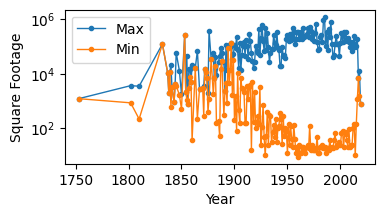

In [13]:
make_plot('default')

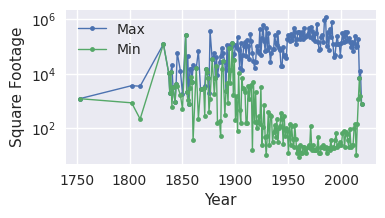

In [14]:
make_plot('seaborn-v0_8')

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [26]:
@ipywidgets.interact(style=plt.style.available)
def make_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(1,1,figsize=(4,2))
        ax.plot(stats["max"], marker='.', linewidth=1.0, label="Max") # Maximum square footage for a year
        ax.plot(stats["min"], marker='.', linewidth=1.0, label="Min") # Minimum ...
        ax.set_xlabel('Year')
        ax.set_ylabel('Square Footage')
        ax.set_yscale('log')
        ax.legend()
    plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', '_mpl-g…

Let's try another "interact" call with another list:

In [27]:
@ipywidgets.interact(name = ['Linda', 'Tina', 'Louise'])
def print_name(name):
    print(name)

interactive(children=(Dropdown(description='name', options=('Linda', 'Tina', 'Louise'), value='Linda'), Output…

In [28]:
itext = ipywidgets.IntText()

In [29]:
#from IPython.display import display
#display(itext)
#!jupyter nbextension enable --py widgetsnbextension
itext

IntText(value=0)

In [30]:
itext.value

5

In [31]:
itext.value = -5

Now we'll start building up some interfaces by combining and *linking* values/traits of different ipywidgets.

In [16]:
ip = ipywidgets.IntProgress(value = 90) # progress bar, at 90% full

In [17]:
ip

IntProgress(value=90)

We're going to link up a integer slider widget to interact with the value of this progress bar widget.

In [18]:
irange = ipywidgets.IntSlider(min = 0, max=100, step=1)
irange

IntSlider(value=0)

In [19]:
ip.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_allow_html',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'tabbable',
 'tooltip',
 'value']

In [20]:
irange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

In [21]:
ip.value, irange.value

(90, 0)

We want to *link* the value of our progress bar with the value of our integer range slider.  Use `.jslink` to do this.

In [22]:
ipywidgets.jslink?

Signature: ipywidgets.jslink(attr1, attr2)
Docstring:
Link two widget attributes on the frontend so they remain in sync.

The link is created in the front-end and does not rely on a roundtrip
to the backend.

Parameters
----------
source : a (Widget, 'trait_name') tuple for the first trait
target : a (Widget, 'trait_name') tuple for the second trait

Examples
--------

>>> c = link((widget1, 'value'), (widget2, 'value'))
File:      c:\users\dyan0\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\ipywidgets\widgets\widget_link.py
Type:      function

In [23]:
ipywidgets.jslink((ip, 'value'), (irange, 'value'))

Link(source=(IntProgress(value=90), 'value'), target=(IntSlider(value=0), 'value'))

In [24]:
ip

IntProgress(value=90)

In [25]:
irange

IntSlider(value=90)

This link is in a sense "back reactive" they are linked everywhere!

I can use some of ipywidgets layout options to make an interface:

In [42]:
ipywidgets.VBox([ip, irange]) # vertical box

In [43]:
ipywidgets.HBox([ip, irange]) # horizontal box

In [44]:
ipywidgets.jslink?

In [45]:
ipywidgets.link?

In [46]:
ip2 = ipywidgets.IntProgress(value = 90)
irange2 = ipywidgets.IntSlider(min=0, max=100, step=1)
ipywidgets.link( (ip2, 'value'), (irange2, 'value') ) # note: "link" NOT "jslink"
ipywidgets.VBox([ip2, irange2])

Note: that "jslink" will work if we try to export this widget setup to the web, but "link" will not because it has to also have a Python kernel working and browser (generally) only have javascript working.

Let's make another interface: Button and some updates to that button.

In [47]:
button = ipywidgets.Button(description='I am a button!')
button

Button(description='I am a button!', style=ButtonStyle())

I have clicked. Click!
I have clicked. Click!
I have clicked. Click!


In [48]:
# have a print function that states that the button has been clicked
def say_click(event):
    print("I have clicked. Click!")

In [51]:
button.on_click?

For the purposes of right now (ignorning as much JS as possible for the time being!) `on_click` function allows us to specify what happens (i.e. function that gets run -- callback -- when our button is clicked).

In [52]:
button.on_click(say_click) # note I am passing a function to a function!

In [53]:
button

Button(description='I am a button!', style=ButtonStyle())

I have clicked. Click!
I have clicked. Click!
I have clicked. Click!
I have clicked. Click!


In [56]:
ip = ipywidgets.IntProgress()

In [61]:
ip

IntProgress(value=0)

In [57]:
button_plus = ipywidgets.Button(description = '+10')

In [58]:
button_plus

Button(description='+10', style=ButtonStyle())

In [59]:
button_minus = ipywidgets.Button(description='-10')

In [60]:
button_minus

Button(description='-10', style=ButtonStyle())

First, let's plan out what this interface will look like:

In [62]:
ipywidgets.HBox([button_minus, ip, button_plus])

I want the value of the progress bar to increase by 10 when I click on `button_plus` and decrease by 10 when I click on `button_minus`

In [63]:
ip.value # value associated with the progress bar

0

In [64]:
# button click function associated with button_minus
def on_click_minus(event):
    ip.value -= 10
    #ip.value = ip.value - 10

In [65]:
# associate this on_click_minus function (callback) with the button_minus.on_click "callback handler" function
button_minus.on_click(on_click_minus)

Now the same thing for the button_plus:

In [66]:
def on_click_plus(event):
    ip.value += 10

In [67]:
button_plus.on_click(on_click_plus)

In [68]:
ipywidgets.HBox([button_minus, ip, button_plus])

In [69]:
ip2 = ipywidgets.IntProgress(value = 90)
irange2 = ipywidgets.IntSlider(min=0, max=100, step=1)
ipywidgets.link( (ip2, 'value'), (irange2, 'value') ) # note: "link" NOT "jslink"

## Traitlets (in more detail)

In [70]:
class MyObject(): # a new type of variable that we can use
    name = 'unnamed'
    age = 0

In [71]:
# define a new variable of this class type
my_obj = MyObject()

In [72]:
my_obj

In [73]:
type(my_obj)

__main__.MyObject

In [74]:
my_obj.name, my_obj.age

('unnamed', 0)

In [75]:
my_obj.name = 'Bob'
my_obj.age = 47

In [76]:
print('Hello, my name is: ', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is:  Bob and I am 47 years old


In [77]:
my_obj.name = 'Linda'
my_obj.age = 45

In [78]:
print('Hello, my name is: ', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is:  Linda and I am 45 years old


Use the traitlets library to "look for changes" in my MyObject varibles.

In [79]:
import traitlets

In [86]:
#class MyObject(): # a new type of variable that we can use
#    name = 'unnamed'
#    age = 0

class MyTraitletObject(traitlets.HasTraits): # inhereting some of the traitlets concepts
    name = traitlets.Unicode('unnamed') # fancy way of saying a trait that is a string
    age = traitlets.Int(0) # trait that is an integer

In [87]:
my_t_obj = MyTraitletObject()

In [88]:
my_t_obj.age = 47
my_t_obj.name = 'Bob'

In [89]:
print('Hello, my name is:', my_t_obj.name, 'and I am', my_t_obj.age, 'years old')

Hello, my name is: Bob and I am 47 years old


We haven't done anything super interesting yet, but looking forward we want to tie changes in the `.name` of our variable to the print statement.

In [90]:
def name_changed(change):
    print(change) # we've ignored what is going on here long enough!
    
my_t_obj.observe(name_changed, ['name'])
# when the .name changes in my my_t_obj do whatever is in the name_changed function

In [91]:
# change something in my object
my_t_obj.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x7f99a93da670>, 'type': 'change'}


In [94]:
my_t_obj = MyTraitletObject()
def name_changed2(change):
    print('Hello, my name is', change['new'], 'and I am', change['owner'].age, 'years old')
my_t_obj.observe(name_changed2, ['name'])

In [95]:
my_t_obj.name = "Tina"

Hello, my name is Tina and I am 0 years old


Let's also watch for changes in the age of a person.

In [96]:
def age_changed(change):
    print('Hello, my name is', change['owner'].name, 'and I am', change['new'], 'years old')

my_t_obj.observe(age_changed, ['age'])

In [97]:
my_t_obj.age = 14

Hello, my name is Tina and I am 14 years old


In [98]:
my_t_obj.name = 'Bob'

Hello, my name is Bob and I am 14 years old


In [99]:
my_t_obj.age = 47

Hello, my name is Bob and I am 47 years old


## For use with the Homework: using the UFO dataset

In [100]:
ufos = pd.read_csv("/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [101]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


A little bit of data cleaning right here -- we'll replace a few NaN measurements.

In [103]:
ufos = ufos.fillna({'country':'unknown', 'state':'unknown', 'shape':'unknown'})

In [104]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


Quick downsampling to deal with this large dataset:

In [107]:
nsamples = 1000 # make a new dataframe that only has 1000 rows in it
downSampleInds = np.random.choice(range(len(ufos)-1), nsamples, replace=False) # replace = False helps with double counting
# if you're like 30% on what is going here, that's great

downSampleInds

array([71935, 12112,  5016, 46750, 70516, 24539, 67529, 35365, 48366,
        7766, 67491, 14666, 14848, 49855, 22965, 37589, 68196, 42563,
       30581, 37861, 70089, 13751, 58223, 33285, 65558, 39948, 51756,
       55695,  7350, 54558, 41071, 16317, 22094, 17836, 45725, 52398,
       28412, 24363, 67027,  4081,  3866, 41996,  1547, 21706, 26828,
       43824,  5169, 35573, 14033, 73618, 73836, 76890, 30210, 66015,
        1891, 55367, 79879, 77254, 54807, 77014, 63797, 18674, 45366,
       35511, 66821, 44974, 69053,  7622, 32738,  4380, 44502, 41189,
       40590,  9393, 32154, 35312, 73688, 24171, 55582, 55169, 31235,
       33901, 29765, 33515, 18471, 71771, 73349, 10096, 35623, 25698,
       46470, 59358, 63557,  9049, 65858, 39033, 19801, 15385, 18426,
        2650, 16940, 51171,  6908,  2262, 73804, 42523, 69626, 50683,
        4989,  5278, 11951, 74436, 46407,  6077, 52887,  6702, 14030,
       78813, 12517, 35327, 63142, 14763,   811, 10882,  1341, 59763,
       25777,  7582,

In [108]:
ufosDS = ufos.loc[downSampleInds]

In [109]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
71935,2011-08-06 23:05:00,tampa,fl,us,fireball,5.0,5 seconds,Green fireball with tail in night sky. ((NUFO...,2011-08-21,27.947222,-82.458611
12112,2010-01-12 04:00:00,eugene,or,us,unknown,120.0,2 minutes,Awaken by several episodes of BRIGHT FLASHING ...,2010-02-14,44.052222,-123.085556
5016,2000-10-28 20:05:00,brandon (county durham)(uk/england),unknown,gb,teardrop,1080.0,18 mins,Slow moving horizontal tear shaped craft over ...,2003-12-09,52.366667,-1.400000
46750,2004-06-11 20:15:00,hyderabad (pakistan),unknown,unknown,triangle,15.0,10-15seconds,on a hot june night me and my friend Ali ahmed...,2004-06-18,17.385044,78.486671
70516,2012-08-29 20:20:00,topeka,ks,us,cross,605.0,5 sec + 10 min,Luminous Flourescent Green Flying Cross,2012-09-24,39.048333,-95.677778
...,...,...,...,...,...,...,...,...,...,...,...
35388,2009-03-08 20:00:00,jasper,tx,us,unknown,2400.0,40 minutes,WHITE LIGHT HOVERS OVER SOUTHEAST TEXAS,2009-03-19,30.920000,-93.996389
98,2000-10-10 20:30:00,brinktown,mo,us,light,1800.0,30 min.,3 bright golden lights moving independently ab...,2000-12-02,38.126667,-92.084444
46828,2011-06-11 22:00:00,winter garden,fl,us,changing,1200.0,20 min,two color changing orbs in the sky,2011-06-12,28.565000,-81.586389
29655,2011-02-06 13:30:00,center conway,nh,us,other,120.0,< 2 min.,Military jets over New Hampshire training or f...,2011-02-18,43.994722,-71.061389


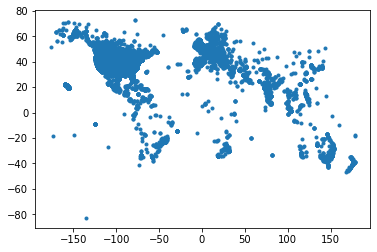

In [111]:
#plt.plot(ufosDS['longitude'], ufosDS['latitude'], '.') # Downsampled!
plt.plot(ufos['longitude'], ufos['latitude'], '.') # full
plt.show()

Start encoding more information -- in particular I'm going to add the colors by the duration in seconds of these UFO sitings!

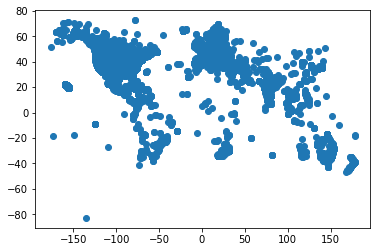

In [113]:
plt.scatter(ufos['longitude'], ufos['latitude']) # changed to a scatter plot, note no marker -- .
plt.show()

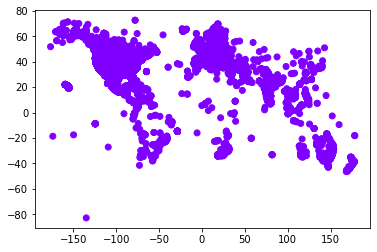

In [114]:
plt.scatter(ufos['longitude'], ufos['latitude'], 
           c=ufos['duration_seconds'], cmap='rainbow') # changed to a scatter plot, note no marker -- .
plt.show()

In [115]:
ufos['duration_seconds']

0        2700.0
1        7200.0
2          20.0
3          20.0
4         900.0
          ...  
80327     600.0
80328    1200.0
80329    1200.0
80330       5.0
80331    1020.0
Name: duration_seconds, Length: 80332, dtype: float64

We have a large range of values for `duration_seconds` so this tells us we probably want to transform our data being used for colors to be able to see a wider range -- log transformation.

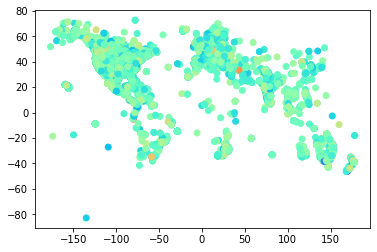

In [116]:
plt.scatter(ufos['longitude'], ufos['latitude'], 
           c=np.log10(ufos['duration_seconds']), cmap='rainbow') # changed to a scatter plot, note no marker -- .
plt.show()

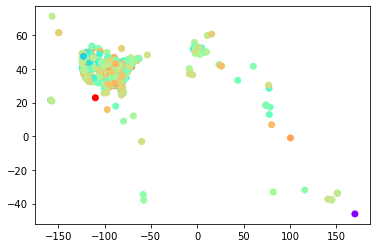

In [117]:
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
           c=np.log10(ufosDS['duration_seconds']), cmap='rainbow') # changed to a scatter plot, note no marker -- .
plt.show()

### For HW questions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f9bac0d0>]],
      dtype=object)

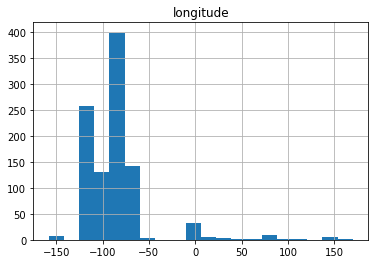

In [123]:
ufosDS.hist(column='longitude', bins=20)

In [124]:
long = ufosDS['longitude']

In [126]:
np.histogram?

In [130]:
ufosDS.columns

Index(['date', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration', 'comment', 'report_date', 'latitude', 'longitude'],
      dtype='object')

In [133]:
np.dtype(ufosDS['city']) # categorical 

dtype('O')

In [135]:
np.dtype(ufosDS['duration_seconds']) # numerical

dtype('float64')